In [1]:
import numpy as np
import pandas as pd
np.set_printoptions(suppress=True)

# Klassen
--------------------
**G** sein eine Gruppe. **a,b,x** $\in$ G. 

**a** und **b** werden in eine *Klasse* zugeordnet, die die folgende Eigenschaft erfüllen:
$$ a = xbx^{-1} $$

wobei **x** einfach irgendein Element aus G sein muss. Man kann auch sagen, dass:
**"a und b zueinander konjugiert sind"** oder **"a~b"**.

#### Anmerkung:
Diese Definition ist gleichbedeutend in der Mathematik mit einer **Äquivalenzrelation** gleichbedeutend. Denn die 3 Eigenschaften:

(1) Reflexivität: a ~ a <br>
(2) Symmetrie: a ~ b $\leftrightarrow$ b ~ a<br>
(3) Transitivität: (a ~ b), (b ~ c) $\leftrightarrow$ a ~ c

### Eigenschaften
##### (a) in einer Abelschen Gruppe gilt:

$$ ab = ba$$
Damit folgt, dass jedes Element seine eigene Klasse bildet, denn:

$$
\begin{align}
a &= xbx^{-1} \space|\cdot x \\
ax &= xb      \\
xa &= xb      \space\space\space\space\space\space\space|x^{-1}\cdot\\
a &= b 
\end{align}
$$
Also können Elemente nur mit sich selber diese Relation erfüllen.



## Beispiel: 

Wir unterteilen jetzt die $C_{3v}$ in Klassen. Aus "Notebooks->Einleitung erinnern wir uns":

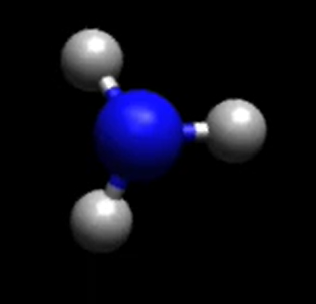

    

$$ C_{3v} = \{E, C_3, C_3^2, \sigma_{v}^{(1)}, \sigma_{v}^{(2)}, \sigma_{v}^{(3)}\}$$

In [6]:
E = np.identity(3)

# Drehmatrix:
def Drehmatrix(x):
    return np.array([[ np.cos(x), -np.sin(x), 0],
                     [ np.sin(x),  np.cos(x), 0],
                     [    0     ,   0       , 1]])
# Winkel
phi = 2*np.pi/3

C3 = Drehmatrix(phi)
C3_2 = Drehmatrix( 2 * phi)


## Spiegelmatrix:

def Spiegelmatrix(x):
    return np.array([[np.cos(2*x), np.sin(2*x), 0],
                     [np.sin(2*x), -np.cos(2*x),0],
                     [0, 0, 1]])

s1 = Spiegelmatrix(0)
s2 = Spiegelmatrix(phi)
s3 = Spiegelmatrix(2*phi)

C3v = [E, C3, C3_2, s1, s2, s3]
name = ["E", "C3", "C3_2", "s1", "s2","s3"]

def zuordnen(G,A):
    n = len(G)
    for i in np.arange(n):
        if np.allclose(G[i],A):
            return i, name[i]

def mult(A,B):
    return np.matmul(A,B)

V = np.empty([6,6], dtype=object)

for i in np.arange(6):
    for j in np.arange(6):
        x = mult(C3v[i],C3v[j])
        ind, n = zuordnen(C3v, x)
        V[i,j] = name[ind]
        
Tabelle = pd.DataFrame(V)
Tabelle = Tabelle.set_axis(name, axis="columns")
Tabelle = Tabelle.set_axis(name, axis="index")
Tabelle


,E,C3,C3_2,s1,s2,s3
E,E,C3,C3_2,s1,s2,s3
C3,C3,C3_2,E,s3,s1,s2
C3_2,C3_2,E,C3,s2,s3,s1
s1,s1,s2,s3,E,C3,C3_2
s2,s2,s3,s1,C3_2,E,C3
s3,s3,s1,s2,C3,C3_2,E


Wir können diese Verknüpfungstafel verwenden um die Klassen zu bestimmen. An den **E**-Einträgen erkennen wir auch sofort. die Inversen Elemente.

$$ a = xbx^{-1} $$

##### (1) Wir setzten <font color='green'>**a = E**</font> und **x** iteriert über alle Elemente:

E  <font color='green'>**E**</font>  E = E <br>
$C_3$   <font color='green'>**E**</font> $C_3^2$ = $C_3$$C_3^2$ = E <br>
$C_3^2$   <font color='green'>**E**</font> $C_3$ = $C_3^2$$C_3$ = E <br>
$\sigma_1$ <font color='green'>**E**</font> $\sigma_1$ = $\sigma_1$$\sigma_1$ = E <br>
$\sigma_2$ <font color='green'>**E**</font> $\sigma_2$ = $\sigma_2$$\sigma_2$ = E <br>
$\sigma_3$ <font color='green'>**E**</font> $\sigma_3$ = $\sigma_3$$\sigma_3$ = E <br>

Somit ist **E** immer in seiner eigenen Klasse, das gilt offensichtlich für alle Gruppen:
$$ K_1 = \{E\}  $$

##### (2) Wir setzten <font color='green'>**a = $C_3$**</font>:

E  <font color='green'>**$C_3$**</font>  E = $C_3$ <br>
$C_3$  <font color='green'>**$C_3$**</font>  $C_3^2$ = $C_3$ E = $C_3$ <br>
$\sigma_1$  <font color='green'>**$C_3$**</font>  $\sigma_1$ = $\sigma_1$$\sigma_3$ = $C_3^2$ <br>
$\sigma_2$  <font color='green'>**$C_3$**</font>  $\sigma_2$ = $\sigma_2$$\sigma_1$ = $C_3^2$ <br>
$\sigma_3$  <font color='green'>**$C_3$**</font>  $\sigma_3$ = $\sigma_3$$\sigma_2$ = $C_3^2$ <br>

Somit gilt:
$$ K_2 = \{C_3, C_3^2\} $$

##### (3) <font color='green'>**a = $\sigma_1$**</font>:

E  <font color='green'>**$\sigma_1$**</font>  E = $\sigma_1$ <br>
$C_3$  <font color='green'>$\sigma_1$</font>  $C_3^2$ = $C_3$$\sigma_3$ = $\sigma_2$ <br>
$\sigma_1$  <font color='green'>**$\sigma_1$**</font>  $\sigma_1$ = $\sigma_1$ <br>
$\sigma_2$  <font color='green'>**$\sigma_1$**</font>  $\sigma_2$ = $\sigma_2$$C_3$ = $\sigma_3$ <br>
$\sigma_3$  <font color='green'>**$\sigma_1$**</font>  $\sigma_3$ = $\sigma_3$$C_3^2$ = $\sigma_2$ <br>

$$ K_3 = \{\sigma_1,\sigma_2,\sigma_3 \}  $$

Somit wurden alle Elemente in Klassen unterteilt.